In [104]:
import pandas as pd
data = pd.read_csv('data/african_crises.csv')


In [105]:
data


,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


In [106]:
data.describe

<bound method NDFrame.describe of       case  cc3   country  year  systemic_crisis    exch_usd  \
0        1  DZA   Algeria  1870                1    0.052264   
1        1  DZA   Algeria  1871                0    0.052798   
2        1  DZA   Algeria  1872                0    0.052274   
3        1  DZA   Algeria  1873                0    0.051680   
4        1  DZA   Algeria  1874                0    0.051308   
...    ...  ...       ...   ...              ...         ...   
1054    70  ZWE  Zimbabwe  2009                1  354.800000   
1055    70  ZWE  Zimbabwe  2010                0  378.200000   
1056    70  ZWE  Zimbabwe  2011                0  361.900000   
1057    70  ZWE  Zimbabwe  2012                0  361.900000   
1058    70  ZWE  Zimbabwe  2013                0  361.900000   

      domestic_debt_in_default  sovereign_external_debt_default  \
0                            0                                0   
1                            0                                0

In [107]:
data.columns


Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

In [108]:
data['banking_crisis'].value_counts()


no_crisis    965
crisis        94
Name: banking_crisis, dtype: int64

In [109]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [110]:
pd.isnull(data).sum()


case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [111]:
data.corr()


,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
case,1.000000,0.115574,0.010991,-0.231976,0.128358,-0.039262,-0.032981,0.044762,0.021858,0.095339,0.006405
year,0.115574,1.000000,0.197450,0.248757,0.136828,0.271890,-0.054670,0.037035,0.407360,0.189390,0.098630
systemic_crisis,0.010991,0.197450,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562
exch_usd,-0.231976,0.248757,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783
domestic_debt_in_default,0.128358,0.136828,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429
sovereign_external_debt_default,-0.039262,0.271890,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930
gdp_weighted_default,-0.032981,-0.054670,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630
inflation_annual_cpi,0.044762,0.037035,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060
independence,0.021858,0.407360,0.147083,0.126034,0.109120,0.228192,0.078936,0.016569,1.000000,0.086376,-0.022548
currency_crises,0.095339,0.189390,0.112751,-0.056472,0.227585,0.199428,0.016970,0.076590,0.086376,1.000000,0.393376


In [112]:
data.skew()

case                                0.015315
year                               -0.975499
systemic_crisis                     3.166538
exch_usd                            3.280760
domestic_debt_in_default            4.724277
sovereign_external_debt_default     1.930854
gdp_weighted_default                7.625672
inflation_annual_cpi               32.541834
independence                       -1.327277
currency_crises                     2.437069
inflation_crises                    2.211871
dtype: float64

In [113]:
data['country'].value_counts()

Egypt                       155
South Africa                114
Zimbabwe                     90
Algeria                      85
Angola                       77
Tunisia                      75
Morocco                      75
Zambia                       72
Mauritius                    68
Kenya                        67
Ivory Coast                  63
Nigeria                      60
Central African Republic     58
Name: country, dtype: int64

In [114]:
data['cc3'].value_counts()

EGY    155
ZAF    114
ZWE     90
DZA     85
AGO     77
TUN     75
MAR     75
ZMB     72
MUS     68
KEN     67
CIV     63
NGA     60
CAF     58
Name: cc3, dtype: int64

In [115]:
data = data.drop(['cc3'], axis=1)

In [116]:
data['case'].unique()

array([ 1,  2, 10, 15, 19, 35, 38, 40, 45, 56, 63, 69, 70], dtype=int64)

In [117]:
x = data.drop(['banking_crisis'], axis=1)
y = data['banking_crisis']

In [118]:
from sklearn.preprocessing import LabelEncoder

le_y = LabelEncoder()
le_y.fit(y)
y = le_y.transform(y)

In [119]:
le_country = LabelEncoder()
le_country.fit(x['country'])
x['country'] = le_country.transform(x['country'])

In [120]:
y = pd.DataFrame(y)

In [121]:
x['banking_crisis'] = y

In [122]:
x.sort_values(['country','year'],inplace=True)

In [123]:
x

,case,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,1,0,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,1,0,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,1,0,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,1,0,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,12,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,0
1055,70,12,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,1
1056,70,12,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,1
1057,70,12,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,1


In [124]:
cat_list = ['case', 'country', 'year', 'systemic_crisis',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'independence','currency_crises', 'inflation_crises', 'banking_crisis']
for col in cat_list:
    print(f'col: {col} unique values:')
    print(x[col].unique())

col: case unique values:
[ 1  2 10 19 15 35 38 40 45 56 63 69 70]
col: country unique values:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
col: year unique values:
[1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883
 1884 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951
 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1968 1969 1970 1971
 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933
 1934 1935 1936 1937 1938 1962 1963 1964 1965 1966 1967 1860 1861 1862
 1863 1864 1865 1866 1867 1868 1869 1885 1886 1887 1888 1889 1890 1891
 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905
 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919
 1920]
col: systemic_crisis unique values:
[1 0]
col: domes

In [125]:
x['currency_crises'] = x.currency_crises.replace(2,1)


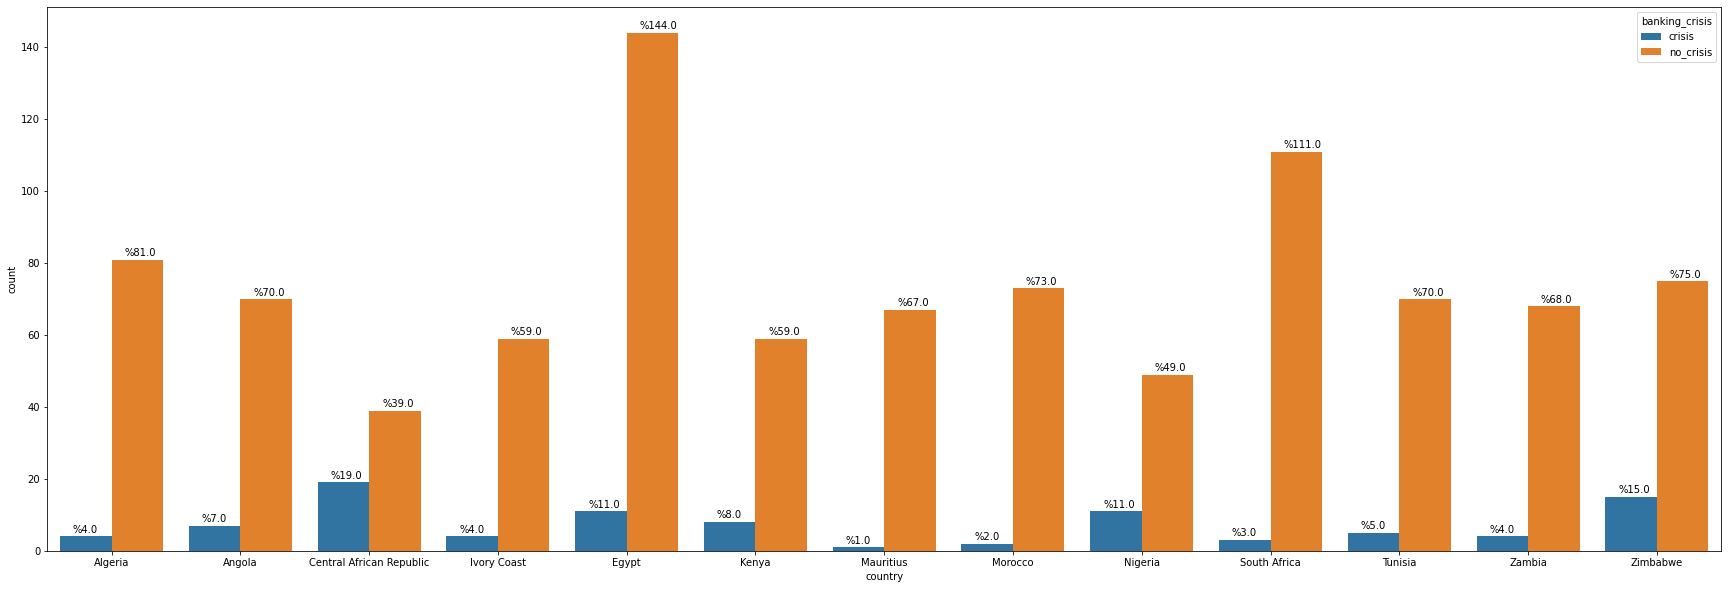

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (30,10))
ax = sns.countplot(x='country',hue='banking_crisis',data=data)
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

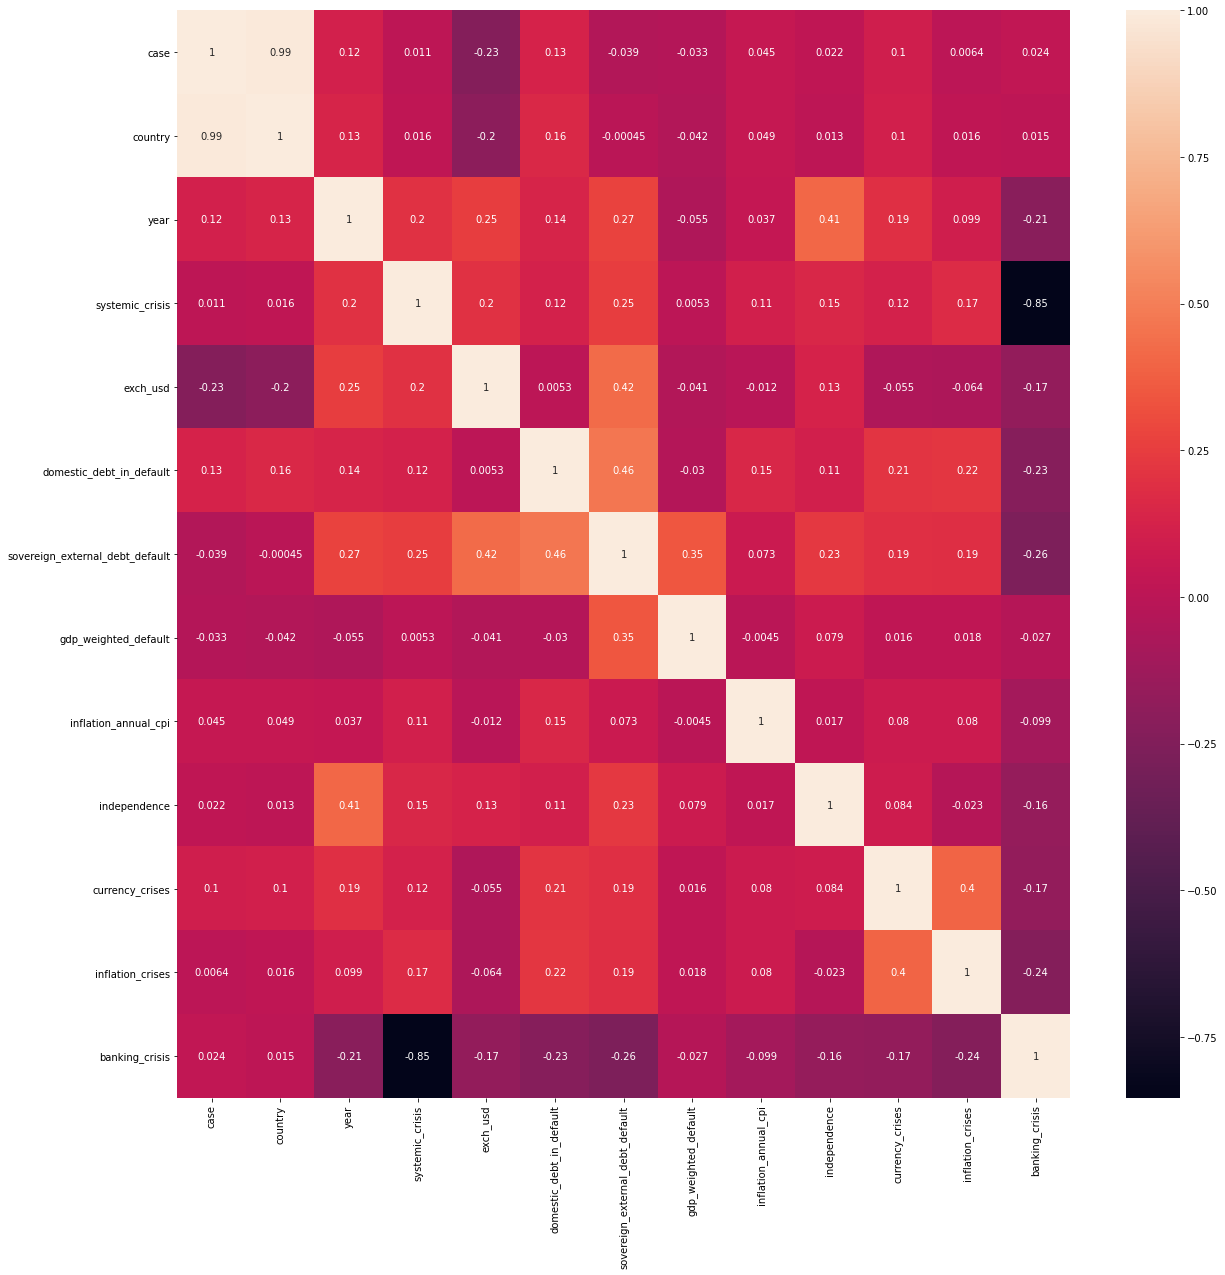

In [127]:
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(x.corr(), annot=True)

In [128]:
x = x.drop(['case'], axis=1)

In [129]:
y = x


In [130]:
y = x['banking_crisis']
x = x.drop(['banking_crisis'], axis=1)



In [131]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x)
x = ss.transform(x)

In [132]:
x

array([[-1.57145157, -2.91715048,  3.45175812, ..., -1.86235185,
        -0.38385624, -0.38547376],
       [-1.57145157, -2.88731291, -0.28970744, ..., -1.86235185,
        -0.38385624, -0.38547376],
       [-1.57145157, -2.85747534, -0.28970744, ..., -1.86235185,
        -0.38385624, -0.38547376],
       ...,
       [ 1.59537472,  1.2899465 , -0.28970744, ...,  0.53695546,
        -0.38385624, -0.38547376],
       [ 1.59537472,  1.31978406, -0.28970744, ...,  0.53695546,
        -0.38385624, -0.38547376],
       [ 1.59537472,  1.34962163, -0.28970744, ...,  0.53695546,
        -0.38385624, -0.38547376]])

In [133]:
pd.DataFrame(x).skew()

0      0.043237
1     -0.975499
2      3.166538
3      3.280760
4      4.724277
5      1.930854
6      7.625672
7     32.541834
8     -1.327277
9      2.224438
10     2.211871
dtype: float64

In [134]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=30, test_size=0.2)

In [135]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [136]:

prediction = lr.predict(x_test)

In [137]:
from sklearn.metrics import accuracy_score

print(accuracy_score(prediction, y_test))

0.9622641509433962


In [138]:
lr.score(x_train, y_train)

0.9787485242030697

In [139]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)

In [140]:
cm

array([[ 10,   6],
       [  2, 194]], dtype=int64)

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


In [142]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]


# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Method of selecting samples for training each tree(with or without replacement)
bootstrap = [True, False]

In [143]:
from pprint import pprint
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [144]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

rf_random.best_params_

best_random = rf_random.best_estimator_

predictions = best_random.predict(x_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [145]:
rf_random.best_params_

{'n_estimators': 1000,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [146]:
print(accuracy_score(predictions, y_test))
cm = confusion_matrix(y_test, predictions)

0.9764150943396226


In [147]:
print(accuracy_score(predictions, y_test))
cm = confusion_matrix(y_test, predictions)

array([[ 13,   3],
       [  2, 194]], dtype=int64)

In [148]:
from imblearn.over_sampling import SMOTE
data['banking_crisis'].value_counts()

no_crisis    965
crisis        94
Name: banking_crisis, dtype: int64

In [149]:
oversample = SMOTE()
x.shape


(1059, 11)

In [160]:
x , y = oversample.fit_resample(x, y)
y.value_counts()


0    965
1    965
Name: banking_crisis, dtype: int64

In [151]:
x.shape

(1930, 11)

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=30, test_size=0.2)

In [153]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [154]:
prediction = lr.predict(x_test)

In [155]:
print(accuracy_score(prediction, y_test))

0.9352331606217616


In [156]:
lr.score(x_train, y_train)

0.9455958549222798

In [157]:
cm = confusion_matrix(y_test, prediction)

In [158]:
cm

array([[184,  21],
       [  4, 177]], dtype=int64)

In [161]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]


# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Method of selecting samples for training each tree(with or without replacement)
bootstrap = [True, False]

In [162]:
from pprint import pprint
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [163]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

rf_random.best_params_

best_random = rf_random.best_estimator_

predictions = best_random.predict(x_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [164]:
rf_random.best_params_

{'n_estimators': 1000,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [165]:
print(accuracy_score(predictions, y_test))
cm = confusion_matrix(y_test, predictions)

0.9896373056994818


In [166]:
cm

array([[203,   2],
       [  2, 179]], dtype=int64)